# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import tensorflow as tf
import pickle
import numpy as np

In [2]:
# Load pickled data


# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:

print (X_train.shape , y_train.shape)
print (X_test.shape , y_test.shape)

print (len(np.unique(train['labels'])))

(39209, 32, 32, 3) (39209,)
(12630, 32, 32, 3) (12630,)
43


In [4]:
X_train[0].shape

(32, 32, 3)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = 39209

# TODO: Number of testing examples.
n_test = 12630

# TODO: What's the shape of an traffic sign image?
image_shape = 32 * 32 * 3

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 3072
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

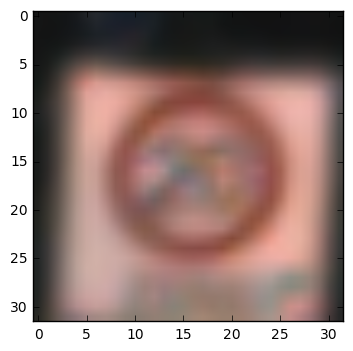

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


imgplot = plt.imshow(X_train[90])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

Counter({2: 2250, 1: 2220, 13: 2160, 12: 2100, 38: 2070, 10: 2010, 4: 1980, 5: 1860, 25: 1500, 9: 1470, 7: 1440, 3: 1410, 8: 1410, 11: 1320, 18: 1200, 35: 1200, 17: 1110, 14: 780, 31: 780, 33: 689, 15: 630, 26: 600, 28: 540, 23: 510, 30: 450, 6: 420, 16: 420, 34: 420, 22: 390, 36: 390, 20: 360, 40: 360, 21: 330, 39: 300, 24: 270, 29: 270, 27: 240, 32: 240, 41: 240, 42: 240, 0: 210, 19: 210, 37: 210})
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42) (210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240)


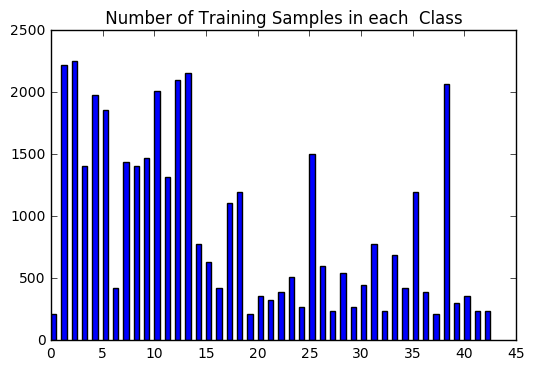

In [7]:
import collections

counter = collections.Counter(y_train)
print(counter)
plt.title(' Number of Training Samples in each  Class ')
labels, values = zip(*counter.items())
print (labels, values)
indexes = np.arange(len(labels))
width = 0.5
plt.bar(indexes, values, width)
plt.show()

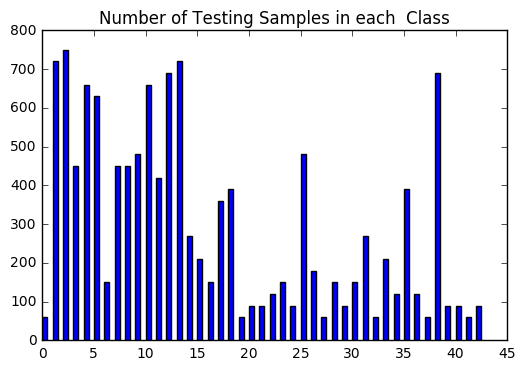

In [8]:
counter = collections.Counter(y_test)
plt.title('Number of Testing Samples in each  Class')
labels, values = zip(*counter.items())

indexes = np.arange(len(labels))
width = 0.5
plt.bar(indexes, values, width)
plt.show()

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.


def normalize(image_data):
    a = 0.1; b = 0.9; MIN = 0; MAX = 255
    return a + (((image_data - MIN)*(b - a))/(MAX - MIN))

X_train = normalize(X_train.astype(np.float32))
print (X_train.shape)

X_test = normalize(X_test.astype(np.float32))
print (X_test.shape)

(39209, 32, 32, 3)
(12630, 32, 32, 3)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

* I have normalized the data with a range from 0.1 to 0.9 for smooth training 

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    random_state=0)
print('Training and validation sets split.')
print('Training Data : ', X_train.shape)
print('Validation Data : ', X_valid.shape)


Training and validation sets split.
Training Data :  (35288, 32, 32, 3)
Validation Data :  (3921, 32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I did not generate any additional data, however I randomize the data since the distribution of the training images is not evenly split. I also went with a 10% test_size for the validation set .

In [11]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    keep_prob = 0.5
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    ## Applying Dropout To FC1
    fc1 = tf.nn.dropout(fc1 , keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    ## Applying Dropout To FC2
    fc2 = tf.nn.dropout(fc2 , keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Applying  L2 Regularization to fc1_W and fc2_W weight layers 
    regularizers = tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)
    
    return logits , regularizers

In [20]:

EPOCHS = 100
BATCH_SIZE = 128

In [21]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

print (one_hot_y.get_shape)

<bound method Tensor.get_shape of <tf.Tensor 'one_hot_1:0' shape=<unknown> dtype=float32>>


####  Creating Training Pipeline

In [22]:
rate = 0.001
beta = 0.01

logits , regularizer = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

loss_operation = tf.reduce_mean(loss_operation + beta * regularizer)

# Loss function using L2 Regularization
loss = tf.reduce_mean(loss_operation + beta * regularizer)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### Model Evaluation


In [23]:
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [81]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

X_train[2:5].shape

(3, 32, 32, 3)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

* Implemented architecture is following LeNet architecture .
* As this is a case of image classification , I thought of leveraging the power of Convolutional networks . So I started with LeNet .

* The layers of the network as follow :

** INPUT_LAYER (32x32x3) -> CONV_LAYER (5x5x3x6) -> RELU -> MAX_POOLING(1,2,2,1) -> CONV_LAYER (5x5x6x16) -> RELU
 -> MAX_POOLING (1,2,2,1) -> FC1(400x120) -> RELU -> FC2 (120x84) -> RELU -> FC3 (84x43) **



In [24]:
### Train your model here.
### Feel free to use as many code cells as needed.
import time

epoch_count = []
train_accuracy = []
val_accuracy = []
iter_per_epoch = 0


start_time = time.clock()

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    iter_per_epoch = np.floor(len(X_train) / BATCH_SIZE)
    
    print("Training...")
    print('Training Start Time ' , start_time)
    
    for i in range(EPOCHS):
        
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            
        validation_accuracy = evaluate(X_valid, y_valid) 
        training_accuracy = evaluate(X_train, y_train)
        
        epoch_count.append(i+1)
        train_accuracy.append(training_accuracy*100)
        val_accuracy.append(validation_accuracy*100)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy*100))
        print("Training Accuracy = {:.3f}".format(training_accuracy*100))
        print('Training End Time ' , time.clock() - start_time)
        print()
        
    saver.save(sess, 'lenet_traffic_sign_clf_2.ckpt')
    print("Model saved")

Training...
Training Start Time  14869.699081
EPOCH 1 ...
Validation Accuracy = 34.175
Training Accuracy = 33.836
Training End Time  163.45266099999935

EPOCH 2 ...
Validation Accuracy = 54.425
Training Accuracy = 52.604
Training End Time  392.3752629999999

EPOCH 3 ...
Validation Accuracy = 61.362
Training Accuracy = 60.788
Training End Time  632.3166389999988

EPOCH 4 ...
Validation Accuracy = 67.636
Training Accuracy = 67.031
Training End Time  874.1584719999992

EPOCH 5 ...
Validation Accuracy = 72.711
Training Accuracy = 71.945
Training End Time  1115.2352409999985

EPOCH 6 ...
Validation Accuracy = 74.726
Training Accuracy = 74.102
Training End Time  1392.2665449999986

EPOCH 7 ...
Validation Accuracy = 75.389
Training Accuracy = 75.371
Training End Time  1760.2055689999997

EPOCH 8 ...
Validation Accuracy = 77.888
Training Accuracy = 77.893
Training End Time  2142.9087659999986

EPOCH 9 ...
Validation Accuracy = 79.827
Training Accuracy = 79.126
Training End Time  2527.098831000

In [ ]:
### Plot Training And Validation Accuracy Epoch wise

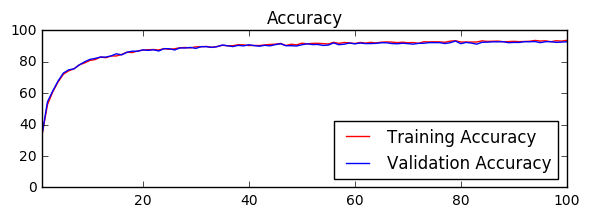

In [25]:
import matplotlib.pyplot as plt

acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(epoch_count, train_accuracy, 'r', label='Training Accuracy')
acc_plot.plot(epoch_count, val_accuracy, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 100])
acc_plot.set_xlim([epoch_count[0], epoch_count[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show() 

#### Test Accuracy

In [26]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy*100))

Test Accuracy = 87.086


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* I have tried to train on different epochs (10,20,30) . I found that , at 30 epochs , Model is more robust and generalized to test data .

* I have kept the batch size as 128, 256 . However 256 batch was not converging and stucked to local minima .So later changed to 128 . It worked fine .

* I have kept the learning  rate unchanged as 0.01 . That worked pretty well .

* Coming to optimizer , Adam performed better than SGD , So Adam optimizer is used here .


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

* As I mentioned above , I have implemented LeNet architecture . 

* Differenet parametrs like epochs , batch size , learning rate were choosen using trial and error .

* To make the model more robust , I have implemeted L2 regularization and used drop out .

* L2 regularization is applied to fc1 and fc2 layer weights . 

* I noticed , dropout didn't help me significantly to improve the accuracy . So I stick to L2 regularization only



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

* I have choosen the five candidate images similar to German dataset .

* The images were in RGBA and changed to 3 channel RGB , later normalized for testing 

* When the images are occluded , model has difficulties to classify those imgaes .

* I have also observed when the images are jittered and angle of images are tilted majorly , making  the classification inaccurate .

* Images which are not present in the training data set and thus giving  no clue to model during training and inference as well .

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(5, 32, 32, 3)
Candidate Images:


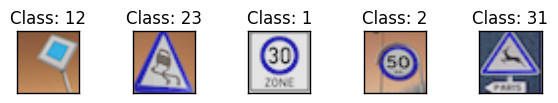

In [78]:
import csv
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

filenames = [
    'priority_road.png',
    'slippery_road.png',
    'limit_30.png',
    'limit_50.png',
    'wild_animals.png']

filenames_np = [
    'priority_road.npy',
    'slippery_road.npy',
    'limit_30.npy',
    'limit_50.npy',
    'wild_animals.npy']


filename_labels = [12,
                   23,
                   1,
                   2,
                   31]

cand_images = []


for img in filenames_np:
    img = np.load(img)
    print (img.shape)
    #img = normalize(sign.astype(np.float32))
    cand_images.append(img)
    
cand_images = np.array(cand_images)
# print (cand_images.shape)
cand_images = normalize(cand_images.astype(np.float32))
print (cand_images.shape)

label_names = {}

with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for (label, name) in reader:
        label_names[label] = name
        
def label_text(label):
    label = str(label)
    return label_names[label]

def addsubplot(i, img):
    plt.subplot(1,5,i)
    plt.xticks(()); plt.yticks(());
    plt.tight_layout(pad=2.5, w_pad=3.0, h_pad=1.0)
    plt.title('Class: {}'.format(filename_labels[i-1]))
    plt.imshow(img)

print('Candidate Images:')
n = 0

for i in range(cand_images.shape[0]):
    #image = np.load(img)
    plt.figure(1)
    addsubplot(n+1, cand_images[i])
    n +=1

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

* Trained model couldn't perform well on the candidate images .
* It couldn't classify  candidate images  correctly .
* I'm collecting more data to add  variance to model training to make it robust .

In [82]:
cand_images.shape

(5, 32, 32, 3)

In [83]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

# def evaluate_candidate_image(X_data, y_data):
#     num_examples = len(X_data)
#     total_accuracy = 0
#     sess = tf.get_default_session()
#     accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data})
#     total_accuracy += (accuracy * len(X_data))
#     return total_accuracy / num_examples

saver = tf.train.Saver()

with tf.Session() as session:
    
    saver.restore(session, "lenet_traffic_sign_clf_2.ckpt")
    print("Model restored from previous training cycle.")
    print("")
    
    prediction_op = tf.argmax(logits, 1)
    predictions = session.run(prediction_op,  feed_dict={x: cand_images, y: filename_labels})
    
    print("{:20}{:8}{:20}".format("FILENAME:", "LABEL:", "PREDICTION:"))
    for i, prediction in enumerate(predictions):
        print("{:20}{:<8}{:20}".format(filenames[i], prediction, label_text(prediction)))


Model restored from previous training cycle.

FILENAME:           LABEL:  PREDICTION:         
priority_road.png   13      Yield               
slippery_road.png   12      Priority road       
limit_30.png        38      Keep right          
limit_50.png        9       No passing          
wild_animals.png    12      Priority road       


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

* Below are my observations on trained model :

  * Out of top 5 softmax probabilities , Only class -2 is present in the list . When I took a closer look at the dataset , I found there are enough samples for Class - 2 (Speed limit (50km/h) are present .
  
  * This is one of the reason , model learned the features for class - 2 and predicted in the top 5 softmax probabilities range .
  
  * Others classes  could not do well , We may need more data and training iterations (epochs) to make the model learn all different possible  features correctly .

In [85]:
from sklearn.preprocessing import LabelBinarizer

def plot_top_k_probabilities(labels, probabilities, title):
    print(title)
    plt.plot(list(labels), list(probabilities), 'ro')
    plt.ylabel('Probability') 
    plt.show()



Model restored from previous training cycle.

Validation Accuracy: 0.97%
Test Accuracy: 0.89%
Candidate Images Accuracy: 0.00%


Predicted (13) Yield, Actual (12) priority_road.png


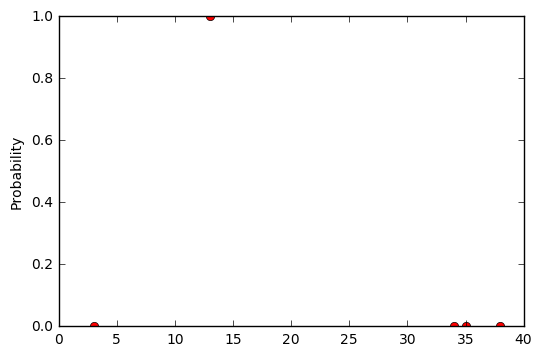


Predicted (12) Priority road, Actual (23) slippery_road.png


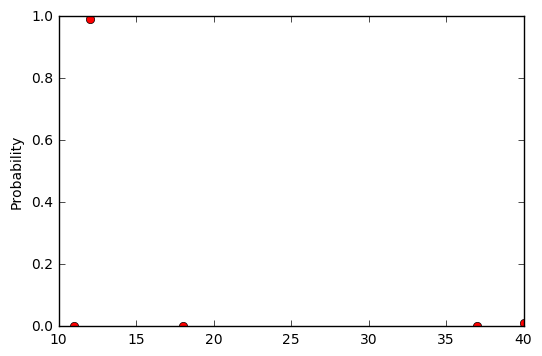


Predicted (38) Keep right, Actual (1) limit_30.png


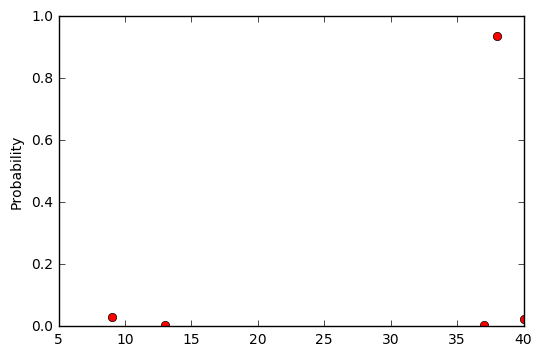


Predicted (9) No passing, Actual (2) limit_50.png


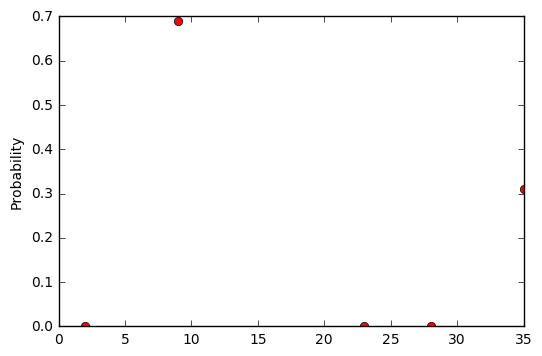


Predicted (12) Priority road, Actual (31) wild_animals.png


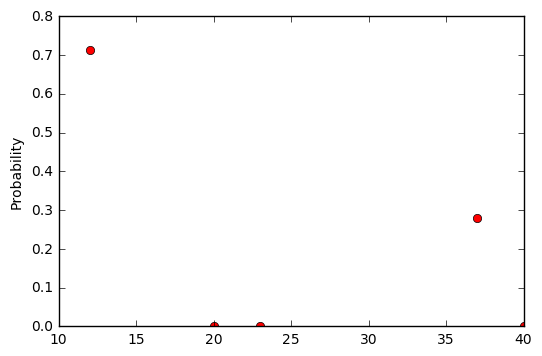

In [89]:
saver = tf.train.Saver()

with tf.Session() as session:
    saver.restore(session, "lenet_traffic_sign_clf_.ckpt")
    print("Model restored from previous training cycle.")
    print("")
    
    prediction_op = tf.nn.softmax(logits)
    top_five = tf.nn.top_k(prediction_op, k=5, sorted=True, name=None)
    predictions, acc = session.run([top_five, accuracy_operation], feed_dict={x: cand_images, y: filename_labels})
    prediction_values, prediction_indices = predictions
    
    print('Validation Accuracy: {:.2f}%'.format(validation_accuracy))
    print('Test Accuracy: {:.2f}%'.format(test_accuracy))
    print('Candidate Images Accuracy: {:.2f}%'.format(acc))
    print("")
    
    for i, (probabilities, labels) in enumerate(zip(prediction_values, prediction_indices)):
        title = "Predicted ({}) {}, Actual ({}) {}".format(labels[0], label_text(labels[0]), filename_labels[i], filenames[i])
        print("")
        plot_top_k_probabilities(labels, probabilities, title)


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.